# Analysis of International Football Matches Between 1872 and 2019 :

In [25]:
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt, patches
from matplotlib.transforms import Bbox
import seaborn as sns
# Counter outil pour effectuer rapidement et facilement des dénombrements.
data = pd.read_csv("results.csv" , sep=',')
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [26]:
# The Differents tournaments
data['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

# Number of Matches per Year

In [29]:
splitted_date = data['date'].str.split('-')
# creating year column
data['year'] = [x[0] for x in splitted_date]
# creating month column
data['month'] = [x[1] for x in splitted_date]
# get the number of matches per year
year_counts = data['year'].value_counts()
year_counts.head(10)

2019    1155
2008    1091
2011    1081
2004    1064
2000    1026
2001    1018
2012    1012
2015    1003
2007     978
2013     965
Name: year, dtype: int64

Text(0.5, 0.98, 'Number of Matches per Year')

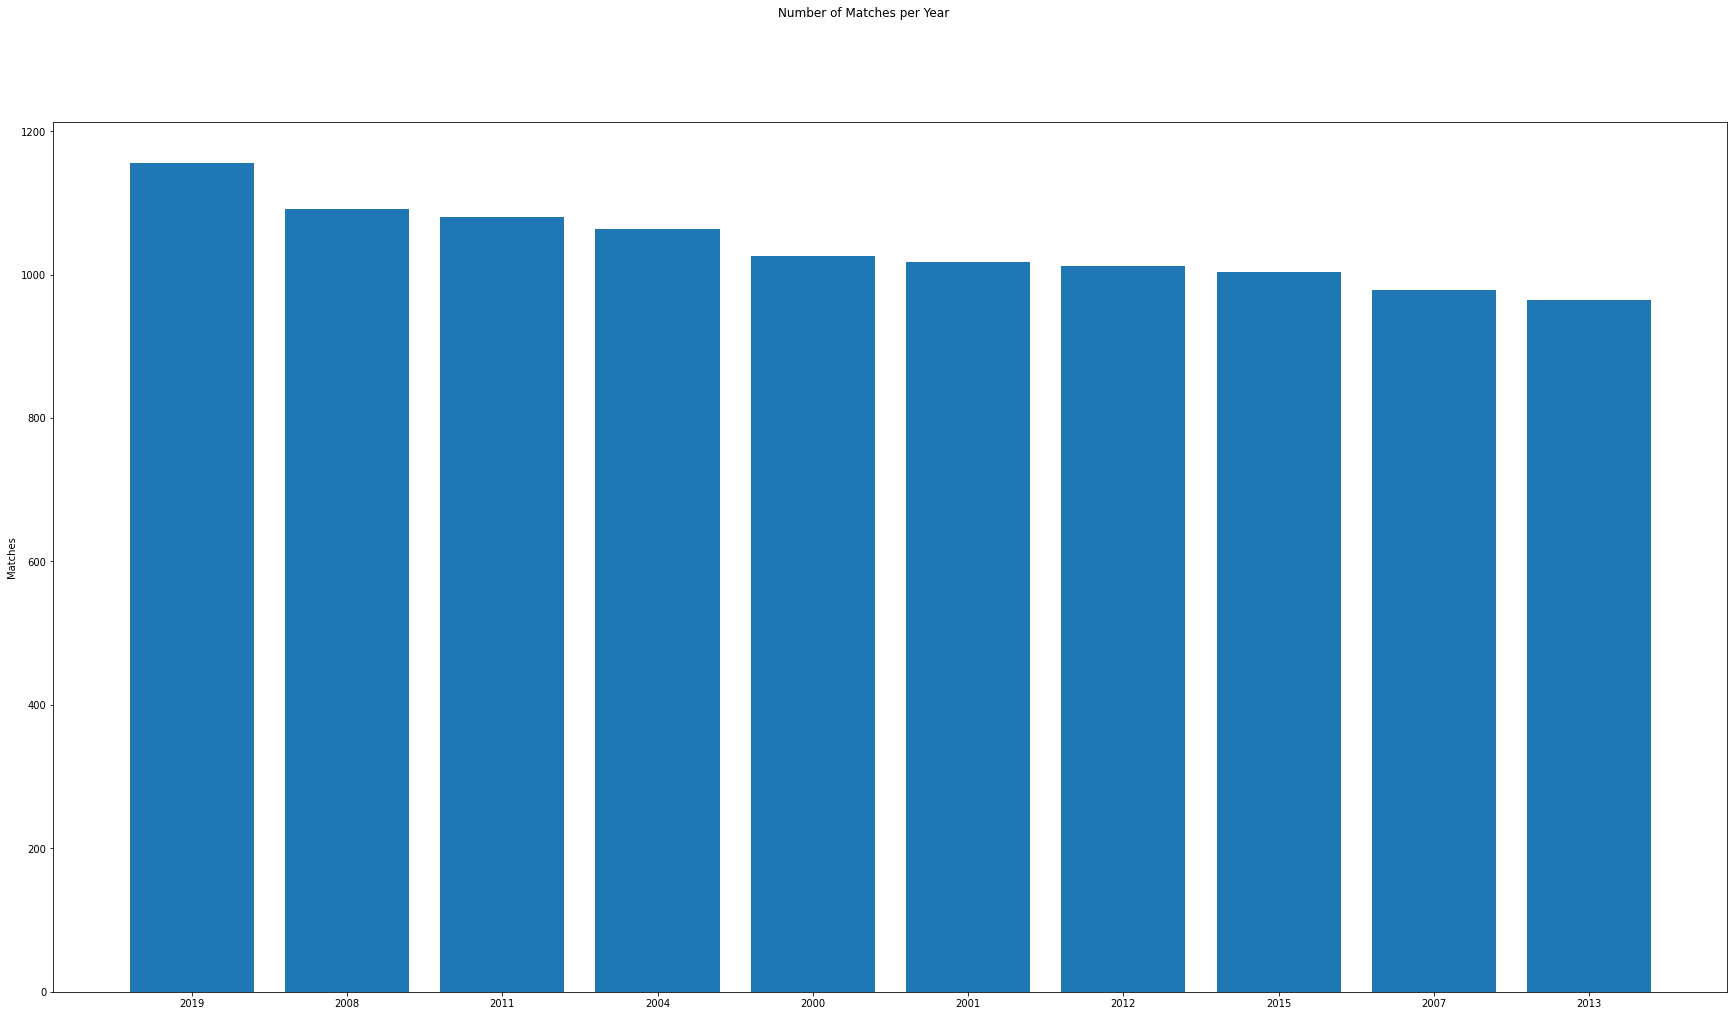

In [34]:
fig, ax = plt.subplots(figsize=(30,16));
ax.bar(year_counts.index, year_counts.iloc[:20])
ax.set_ylabel('Matches')
fig.suptitle('Number of Matches per Year')

In [35]:
# find the years with the largest and the smallest number of matches
year_counts.sort_values(ascending=False).iloc[[0, -1]]

2019    1155
2013     965
Name: year, dtype: int64

# Number of matches in each month of the year

In [36]:
# get the number of matches in each month of the year
month_counts = data['month'].value_counts()
# find the months with the largest and the smallest number of matches
month_counts.sort_values(ascending=False).iloc[[0, -1]]

06    5969
01    2218
Name: month, dtype: int64

Text(0.5, 0.98, 'Number of Matches per Month')

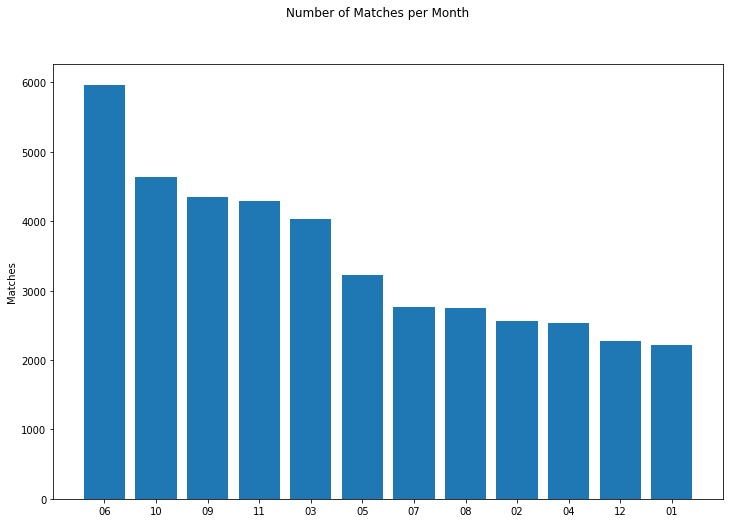

In [37]:
fig, ax = plt.subplots(figsize=(12,8));
ax.bar(month_counts.index, month_counts)
ax.set_ylabel('Matches')
fig.suptitle('Number of Matches per Month')

# Number of Goals per Year

In [38]:
# create a new column 
data['total_goals'] = data['home_score'] + data['away_score']
# game with the largest score
data[data['total_goals'] == data['total_goals'].max()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,total_goals
23796,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,2001,04,31


In [39]:
year_goals = data.groupby('year')['total_goals'].sum()
year_goals.sort_values(ascending=False).head()

year
2019    3318
2001    3101
2004    3098
2011    2980
2008    2950
Name: total_goals, dtype: int64

Text(0.5, 0.98, 'Number of Goals per Year')

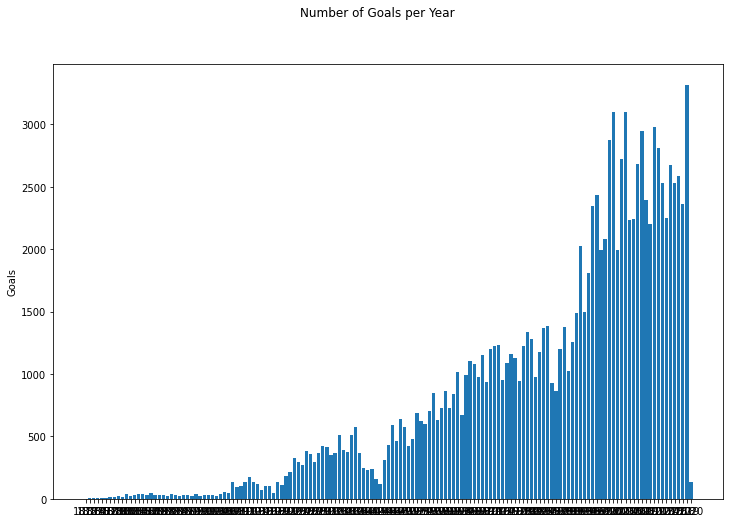

In [41]:
fig, ax = plt.subplots(figsize=(12,8));
ax.bar(year_goals.index, year_goals)
ax.set_ylabel('Goals')
fig.suptitle('Number of Goals per Year')

# Teams that played the Largest Number of Matches

In [153]:
tournaments = ['Friendly', 'FIFA World Cup', 'UEFA Euro', 'African Cup of Nations', 'CFU Caribbean Cup', 
                           'Copa América', 'AFC Asian Cup', 'Other']
cdf1 = data[['home_team', 'tournament']].rename(columns={'home_team': 'team'})
cdf2 = data[['away_team', 'tournament']].rename(columns={'away_team': 'team'})
cdf = pd.concat([cdf1, cdf2], axis=0, ignore_index=True)
cdf['count'] = 1
cdf_piv = cdf.pivot_table(values='count', index='team', columns='tournament', aggfunc=np.sum, fill_value=0)
tournament_counts = cdf['tournament'].value_counts(sort=True, ascending=False)
teams = data['home_team'].append(data['away_team'], ignore_index=True)
team_counts = teams.value_counts().sort_values(ascending=False).iloc[:20];
team_counts.head()

Sweden       1020
England      1011
Brazil        981
Argentina     980
Germany       951
dtype: int64

Text(0.5, 0.98, 'Number of Games per Team')

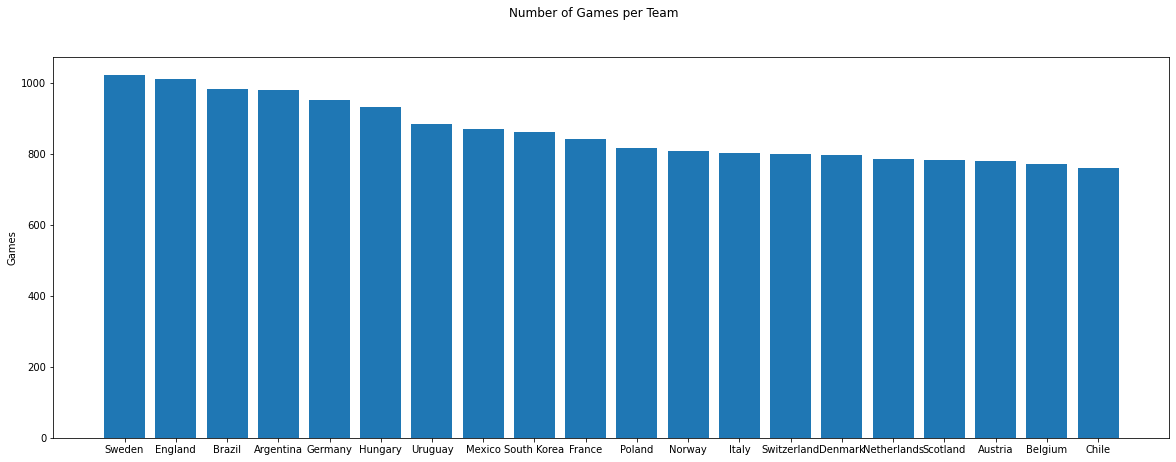

In [154]:
fig, ax = plt.subplots(figsize=(20,7));
ax.bar(team_counts.index, team_counts)
ax.set_ylabel('Games')
fig.suptitle('Number of Games per Team')

# Teams that scored the largest number of goals

In [105]:
cdf1 = data[['home_team', 'home_score']].rename(columns={'home_team': 'team', 'home_score': 'score'})
cdf2 = data[['away_team', 'away_score']].rename(columns={'away_team': 'team', 'away_score': 'score'})
cdf = pd.concat([cdf1, cdf2], axis=0, ignore_index=True)
cdf = cdf.groupby('team').sum().sort_values(by='score', axis=0, ascending=False).head(20)
cdf.head()

,score
team,
England,2209
Brazil,2149
Germany,2126
Sweden,2015
Hungary,1889


Text(0.5, 0.98, 'Number of Goals per Team')

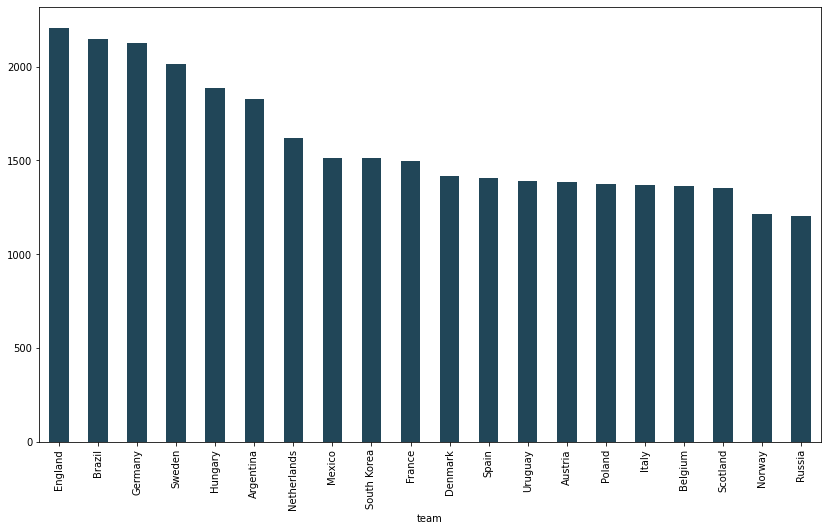

In [106]:
ax = cdf.plot(kind='bar', figsize=(14,8), color='#214658', legend=False);
fig.suptitle('Number of Goals per Team')

# Team that scored the largest number of goals in a WC

In [107]:
cdf1 = data[data['tournament'] == 'FIFA World Cup'][['home_team', 'home_score']].rename(
    columns={'home_team': 'team', 'home_score': 'score'})
cdf2 = data[data['tournament'] == 'FIFA World Cup'][['away_team', 'away_score']].rename(
    columns={'away_team': 'team', 'away_score': 'score'})
cdf = pd.concat([cdf1, cdf2], axis=0, ignore_index=True)
cdf = cdf.groupby('team').sum().sort_values(by='score', axis=0, ascending=False).head(20)
display(cdf.head())

,score
team,
Brazil,229
Germany,226
Argentina,137
Italy,128
France,120


Text(0.5, 0.98, 'Number of Goals per Team in WC')

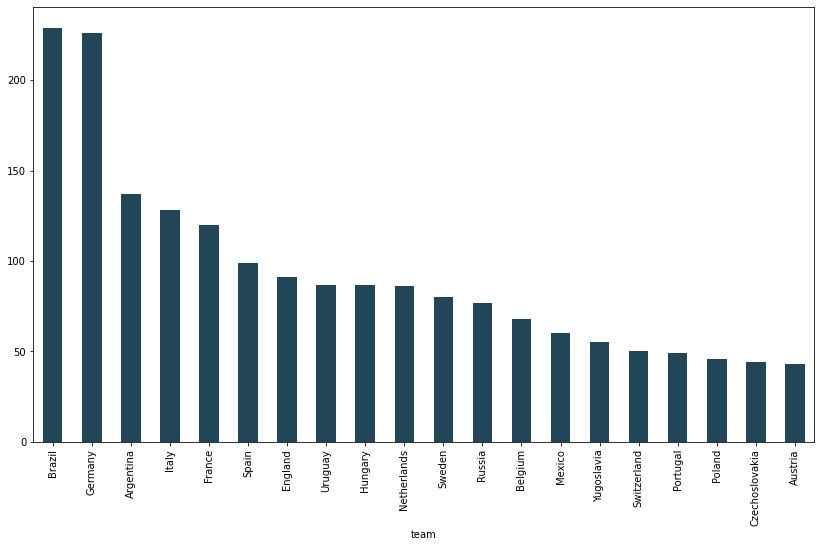

In [108]:
ax = cdf.plot(kind='bar', figsize=(14,8), color='#214658', legend=False);
fig.suptitle('Number of Goals per Team in WC')

#  Teams that played against each other the most

In [109]:
teams = []
for i in range(data.shape[0]):
    tuple_teams = [data.loc[i, 'home_team'], data.loc[i, 'away_team']]
    tuple_teams.sort()
    teams.append(tuple(tuple_teams))
common_two_teams = Counter(teams).most_common(20)
common_two_teams = [(' VS '.join(a), b) for a,b in common_two_teams]
common_two_teams = pd.DataFrame(common_two_teams, columns=['Teams', 'No. of matches'])
common_two_teams.head()

,Teams,No. of matches
0,Argentina VS Uruguay,176
1,Austria VS Hungary,133
2,Belgium VS Netherlands,125
3,England VS Scotland,116
4,Norway VS Sweden,107


In [141]:
common_two_teams_sorted = common_two_teams.sort_values(by='No. of matches', ascending=True)
common_two_teams_sorted

,Teams,No. of matches
19,Brazil VS Paraguay,78
18,Chile VS Uruguay,78
17,Chile VS Peru,79
16,Denmark VS Norway,85
15,Argentina VS Chile,88
14,Finland VS Sweden,89
13,Northern Ireland VS Wales,94
12,Northern Ireland VS Scotland,95
11,England VS Northern Ireland,99
10,Argentina VS Paraguay,101


<AxesSubplot:ylabel='Teams'>

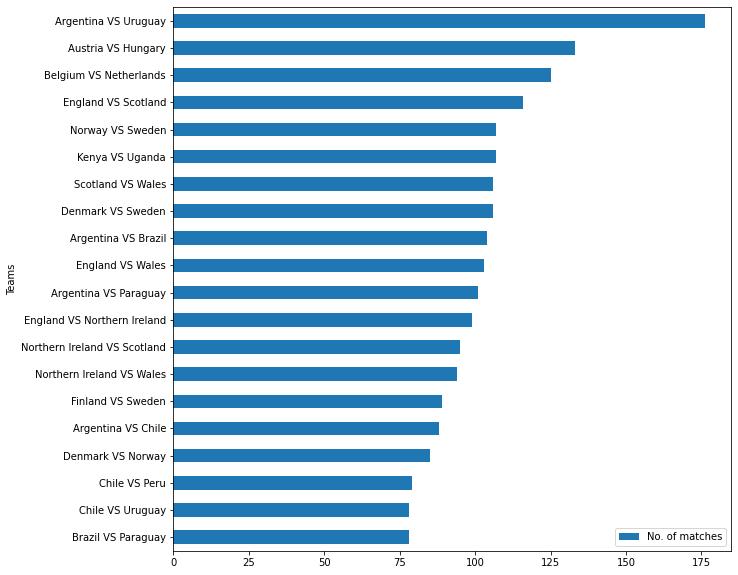

In [144]:
common_two_teams_sorted.plot.barh('Teams', 'No. of matches', figsize=(10,10)) 

Text(0.5, 0.98, 'Number of Games')

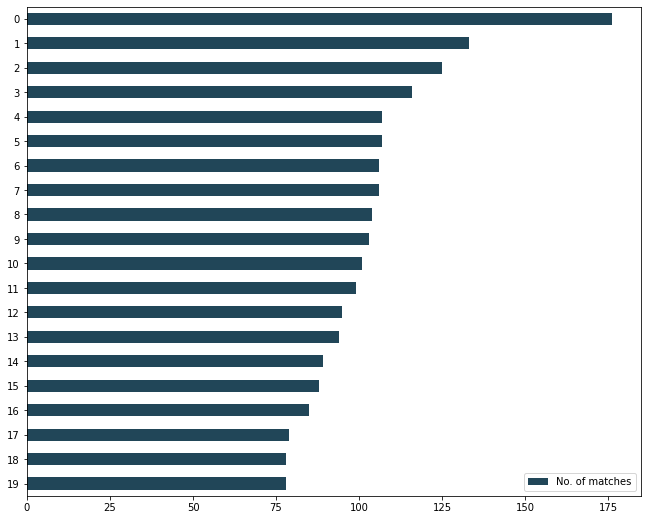

In [110]:
ax = common_two_teams.sort_values(by='No. of matches', ascending=True).plot(kind='barh', figsize=(11,9),
                                                                                color='#214658')
ax.
fig.suptitle('Number of Games')

# Team that won the Largest Number of Matches

In [111]:
def getMatchScore(scores):
    if scores['home_score'] > scores['away_score']:
        return 'home_win'
    elif scores['home_score'] == scores['away_score']:
        return 'draw'
    else:
        return 'away_win'

data['result'] = data[['home_score', 'away_score']].apply(getMatchScore, axis=1)

def getWinner(s):
    if s['result'] == 'draw':
        return 'draw'
    elif s['result'] == 'home_win':
        return s['home_team']
    else:
        return s['away_team']
        
data['winner'] = data[['home_team', 'away_team', 'result']].apply(getWinner, axis=1)
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,total_goals,result,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,draw,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,03,6,home_win,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,03,3,home_win,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,03,4,draw,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,03,3,home_win,Scotland


Text(0.5, 0.98, 'Number of Wins per Team')

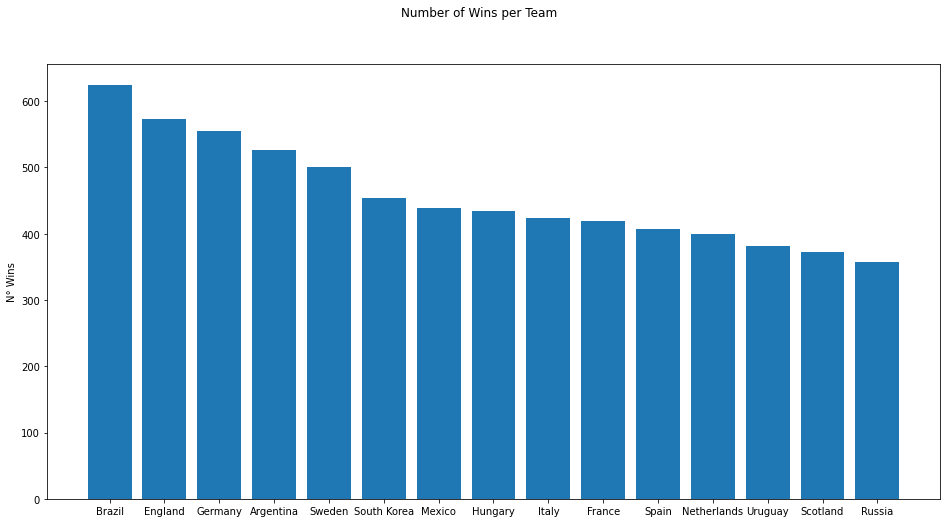

In [22]:
cdf = data[data.winner != 'draw']
winner_counts = cdf.winner.value_counts().sort_values(ascending=False).head(15)
fig, ax = plt.subplots(figsize=(16,8));
ax.bar(winner_counts.index, winner_counts)
ax.set_ylabel('N° Wins')
fig.suptitle('Number of Wins per Team')

# Teams that lost the Largest Number of Matches

In [113]:
def getLoser(s):
    if s['result'] == 'draw':
        return 'draw'
    elif s['result'] == 'home_win':
        return s['away_team']
    else:
        return s['home_team']
        
data['loser'] = data[['home_team', 'away_team', 'result']].apply(getLoser, axis=1)
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,total_goals,result,winner,loser
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,draw,draw,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,03,6,home_win,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,03,3,home_win,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,03,4,draw,draw,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,03,3,home_win,Scotland,England


Text(0.5, 0.98, 'Number of defeats per Team')

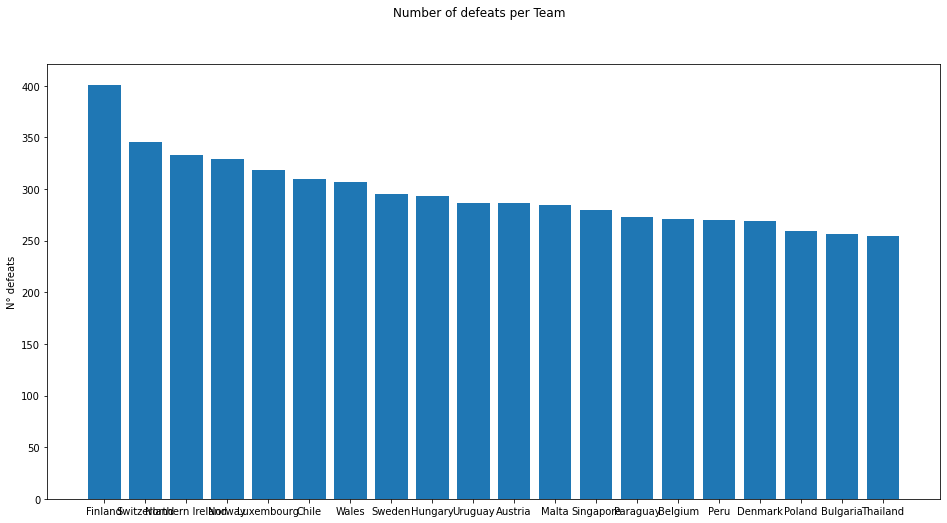

In [114]:
cdf = data[data.loser != 'draw']
loser_counts = cdf.loser.value_counts().sort_values(ascending=False).head(20)
fig, ax = plt.subplots(figsize=(16,8));
ax.bar(loser_counts.index, loser_counts)
ax.set_ylabel('N° defeats')
fig.suptitle('Number of defeats per Team')

# Percentage of Matches that Ended in a Draw

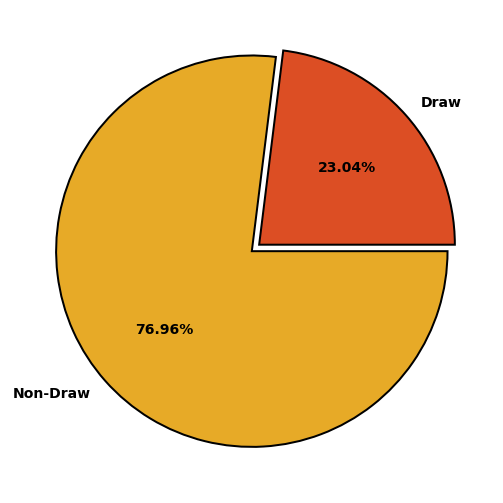

In [115]:
draw_perc = data[data.result == 'draw'].shape[0] / data.shape[0]
fig, ax = plt.subplots(figsize=(14, 9))
ax.pie([draw_perc, 1-draw_perc], explode=[0.05, 0], labels=['Draw', 'Non-Draw'], autopct='%.2f%%', 
       colors=['#dc4e24', '#e7aa27'], textprops={'fontsize':14, 'fontweight':'bold'}, 
       wedgeprops={'linewidth': 2, 'edgecolor': 'black'});

# Goals in Friendly Matches VS Non-Friendly Matches

In [134]:
fr_goals = data[data['tournament'] == 'Friendly']['total_goals'].sum()
fr_count = data[data['tournament'] == 'Friendly']['total_goals'].shape[0]
fr_avg_goals = fr_goals / fr_count

In [135]:
nonfr_goals = data[data['tournament'] != 'Friendly']['total_goals'].sum()
nonfr_count = data[data['tournament'] != 'Friendly']['total_goals'].shape[0]
nonfr_avg_goals = nonfr_goals / nonfr_count

Text(0.5, 0.98, 'Number of defeats per Team')

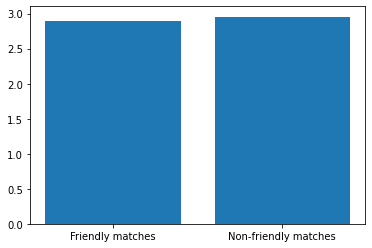

In [150]:
xvalues = max(nonfr_avg_goals,fr_avg_goals)
# fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(x = ['Friendly matches', 'Non-friendly matches'], height = [fr_avg_goals, nonfr_avg_goals])
fig.suptitle('Number of defeats per Team')

# Tournament with More Goals

In [168]:
cdf = data[['tournament', 'total_goals']].copy()
tournamentMatches = cdf.groupby('tournament')['total_goals'].count()
pd.DataFrame(tournamentMatches).rename(columns={'total_goals': 'games_number'})

,games_number
tournament,
ABCS Tournament,20
AFC Asian Cup,370
AFC Asian Cup qualification,724
AFC Challenge Cup,100
AFC Challenge Cup qualification,92
...,...
Viva World Cup,56
WAFF Championship,97
West African Cup,54


In [169]:
cdf2 = pd.DataFrame(data.groupby('tournament')['total_goals'].sum().sort_values(ascending=False).head(10).sort_values())
pd.DataFrame(cdf2)

,total_goals
tournament,
Merdeka Tournament,1681
British Championship,1778
CFU Caribbean Cup qualification,2125
AFC Asian Cup qualification,2419
FIFA World Cup,2548
Copa América,2606
African Cup of Nations qualification,3982
UEFA Euro qualification,7306
FIFA World Cup qualification,20893


Questions Pertinentes abordées :
- La meilleure équipe de tous les temps;
- Palmarès des équipes à travers les différentes ères;

In [ ]:
data= pd.read_csv("results.csv", index_col='date', parse_dates=True)

In [10]:
def getGameResult(scores):
    if scores['home_score'] > scores['away_score']:
        return 'home_win'
    elif scores['home_score'] == scores['away_score']:
        return 'draw'
    else:
        return 'away_win'

data['result'] = data[['home_score', 'away_score']].apply(getGameResult, axis=1)

def getWinner(s):
    if s['result'] == 'draw':
        return 
    elif s['result'] == 'home_win':
        return s['home_team']
    else:
        return s['away_team']
data['winner'] = data[['home_team', 'away_team', 'result']].apply(getWinner, axis=1)

In [11]:
data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,winner
date,,,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,None
1873-03-08,England,Scotland,4,2,Friendly,London,England,False,home_win,England
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,home_win,Scotland
1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw,None
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,home_win,Scotland


# Historique du plus grand nombre de victoires des 30 premieres équipes

<AxesSubplot:title={'center':'Historique du plus grand nombre de victoires des 30 premieres équipes'}>

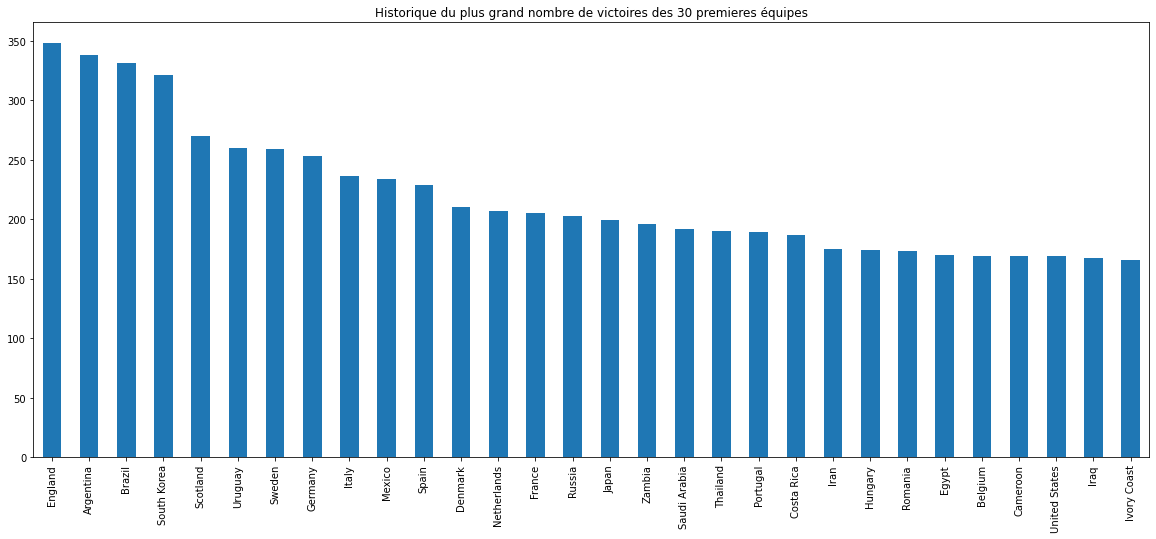

In [12]:
# Historique du plus grand nombre de victoires des 30 premieres équipes
winners = data['winner'][data['tournament'] != 'Friendly'].value_counts().iloc[0:30]
winners.plot.bar(x=None, y=None, figsize=(20,8), title="Historique du plus grand nombre de victoires des 30 premieres équipes")


# les 10 premières équipes qui ont le plus gros nombre de buts à domicile

Brazil           404
Argentina        361
Germany          317
England          308
Mexico           302
Sweden           282
France           281
South Korea      277
Italy            277
Hungary          256
Spain            246
Egypt            239
Netherlands      238
United States    220
Belgium          217
Denmark          217
Scotland         215
Austria          212
Saudi Arabia     207
Chile            207
Name: home_team, dtype: int64


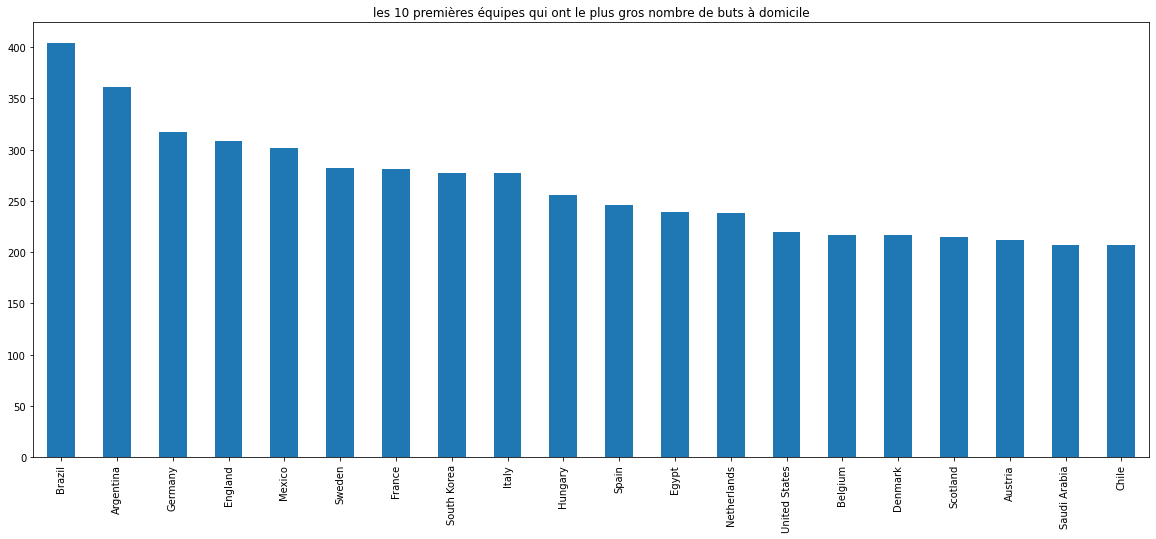

In [15]:
#les 10 premières équipes qui ont le plus gros nombre de buts à domicile
maxScoreHome = data[data['home_score'] > data['away_score']]['home_team'].value_counts()
maxScoreHome.iloc[:20].plot.bar(title="les 10 premières équipes qui ont le plus gros nombre de buts à domicile", figsize=(20, 8))
print(maxScoreHome.iloc[:20])

# les 10 premières équipes qui ont le plus gros nombre de buts à l'éxterieur

England                     265
Germany                     238
Brazil                      221
Sweden                      218
Uruguay                     192
                           ... 
Andalusia                     1
Yorkshire                     1
Northern Mariana Islands      1
Somaliland                    1
Brittany                      1
Name: away_team, Length: 285, dtype: int64


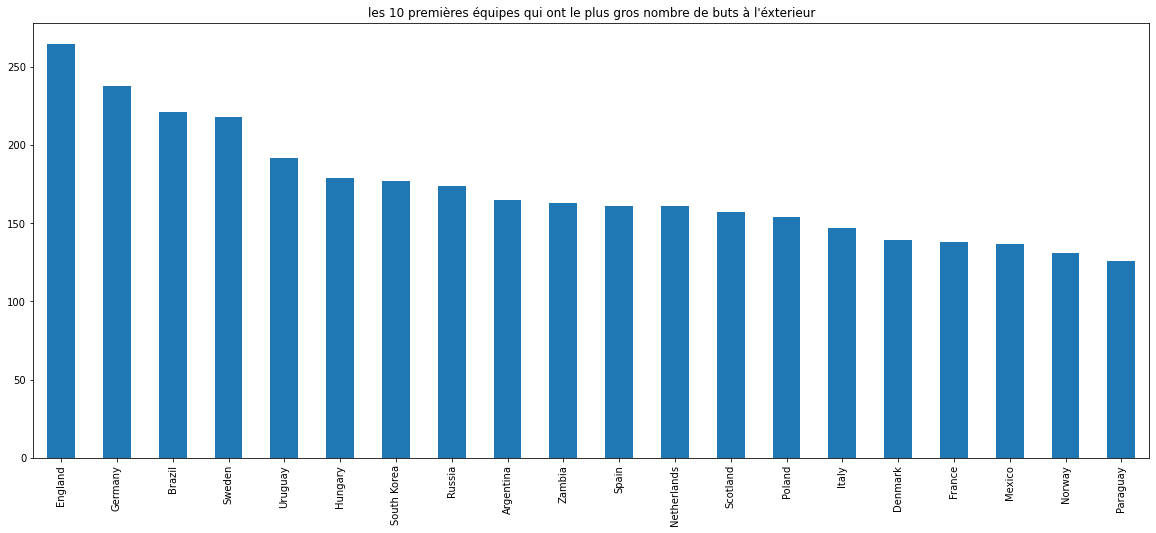

In [16]:
#les 10 premières équipes qui ont le plus gros nombre de buts à l'éxterieur
maxScoreAway = data[data['away_score'] > data['home_score']]['away_team'].value_counts()
maxScoreAway.iloc[:20].plot.bar(title="les 10 premières équipes qui ont le plus gros nombre de buts à l'éxterieur", figsize=(20, 8))
print(maxScoreAway)

# les 10 premières équipes qui ont le plus encaissé à domicile

Luxembourg          164
Finland             157
Northern Ireland    139
Malta               139
Switzerland         138
                   ... 
County of Nice        1
Saint Helena          1
Felvidék              1
Kabylia               1
Arameans Suryoye      1
Name: home_team, Length: 300, dtype: int64


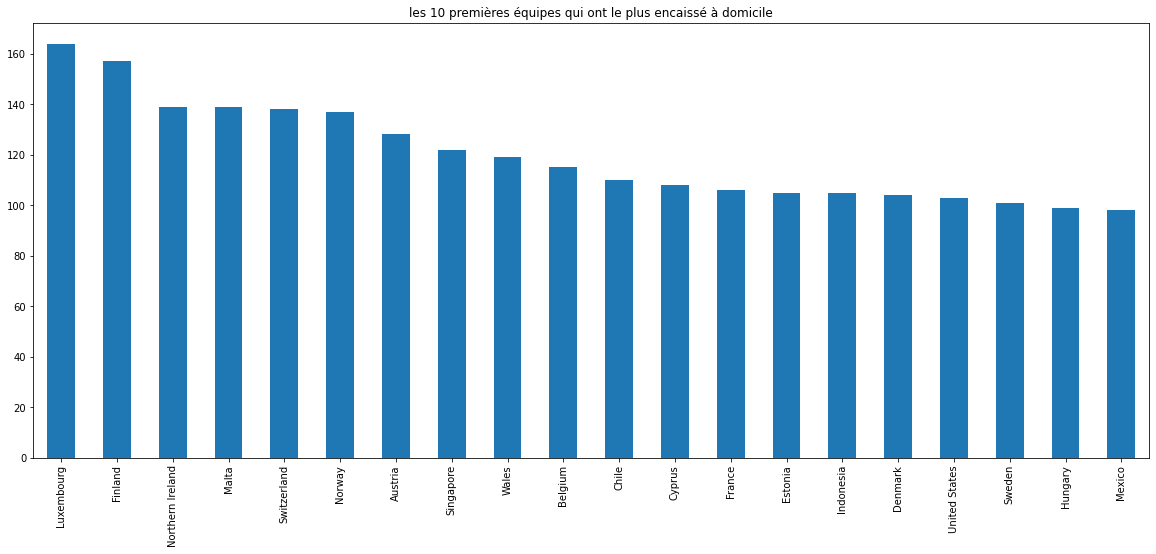

In [17]:
#les 10 premières équipes qui ont le plus encaissé à domicile
minScoreAgaintHome = data[data['away_score'] > data['home_score']]['home_team'].value_counts().sort_values(ascending=False)
minScoreAgaintHome.iloc[:20].plot.bar(title="les 10 premières équipes qui ont le plus encaissé à domicile", figsize=(20, 8))
print(minScoreAgaintHome)

# les 10 premières équipes qui ont le plus encaissé à l'éxterieur

Finland               244
Uruguay               226
Paraguay              210
Switzerland           207
Chile                 200
                     ... 
Romani people           1
Barawa                  1
Parishes of Jersey      1
Artsakh                 1
Galicia                 1
Name: away_team, Length: 300, dtype: int64


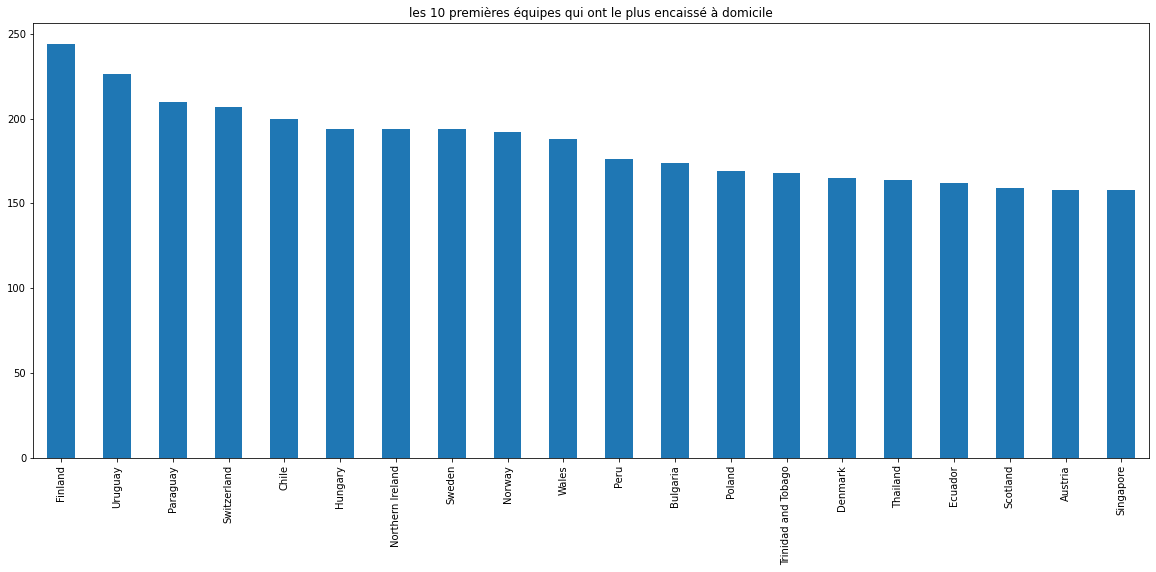

In [18]:
#les 10 premières équipes qui ont le plus encaissé à l'éxterieur
minScoreAgaintHome = data[data['away_score'] < data['home_score']]['away_team'].value_counts().sort_values(ascending=False)
minScoreAgaintHome.iloc[:20].plot.bar(title="les 10 premières équipes qui ont le plus encaissé à domicile", figsize=(20, 8))
print(minScoreAgaintHome)

# Les statistiques des 10 équipes les plus victorieuses  durant différentes éres

/Users/abdo17r/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/abdo17r/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/abdo17r/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/abdo17r/opt/anac

<AxesSubplot:title={'center':'2018:2020'}, ylabel='nombres de victoire'>

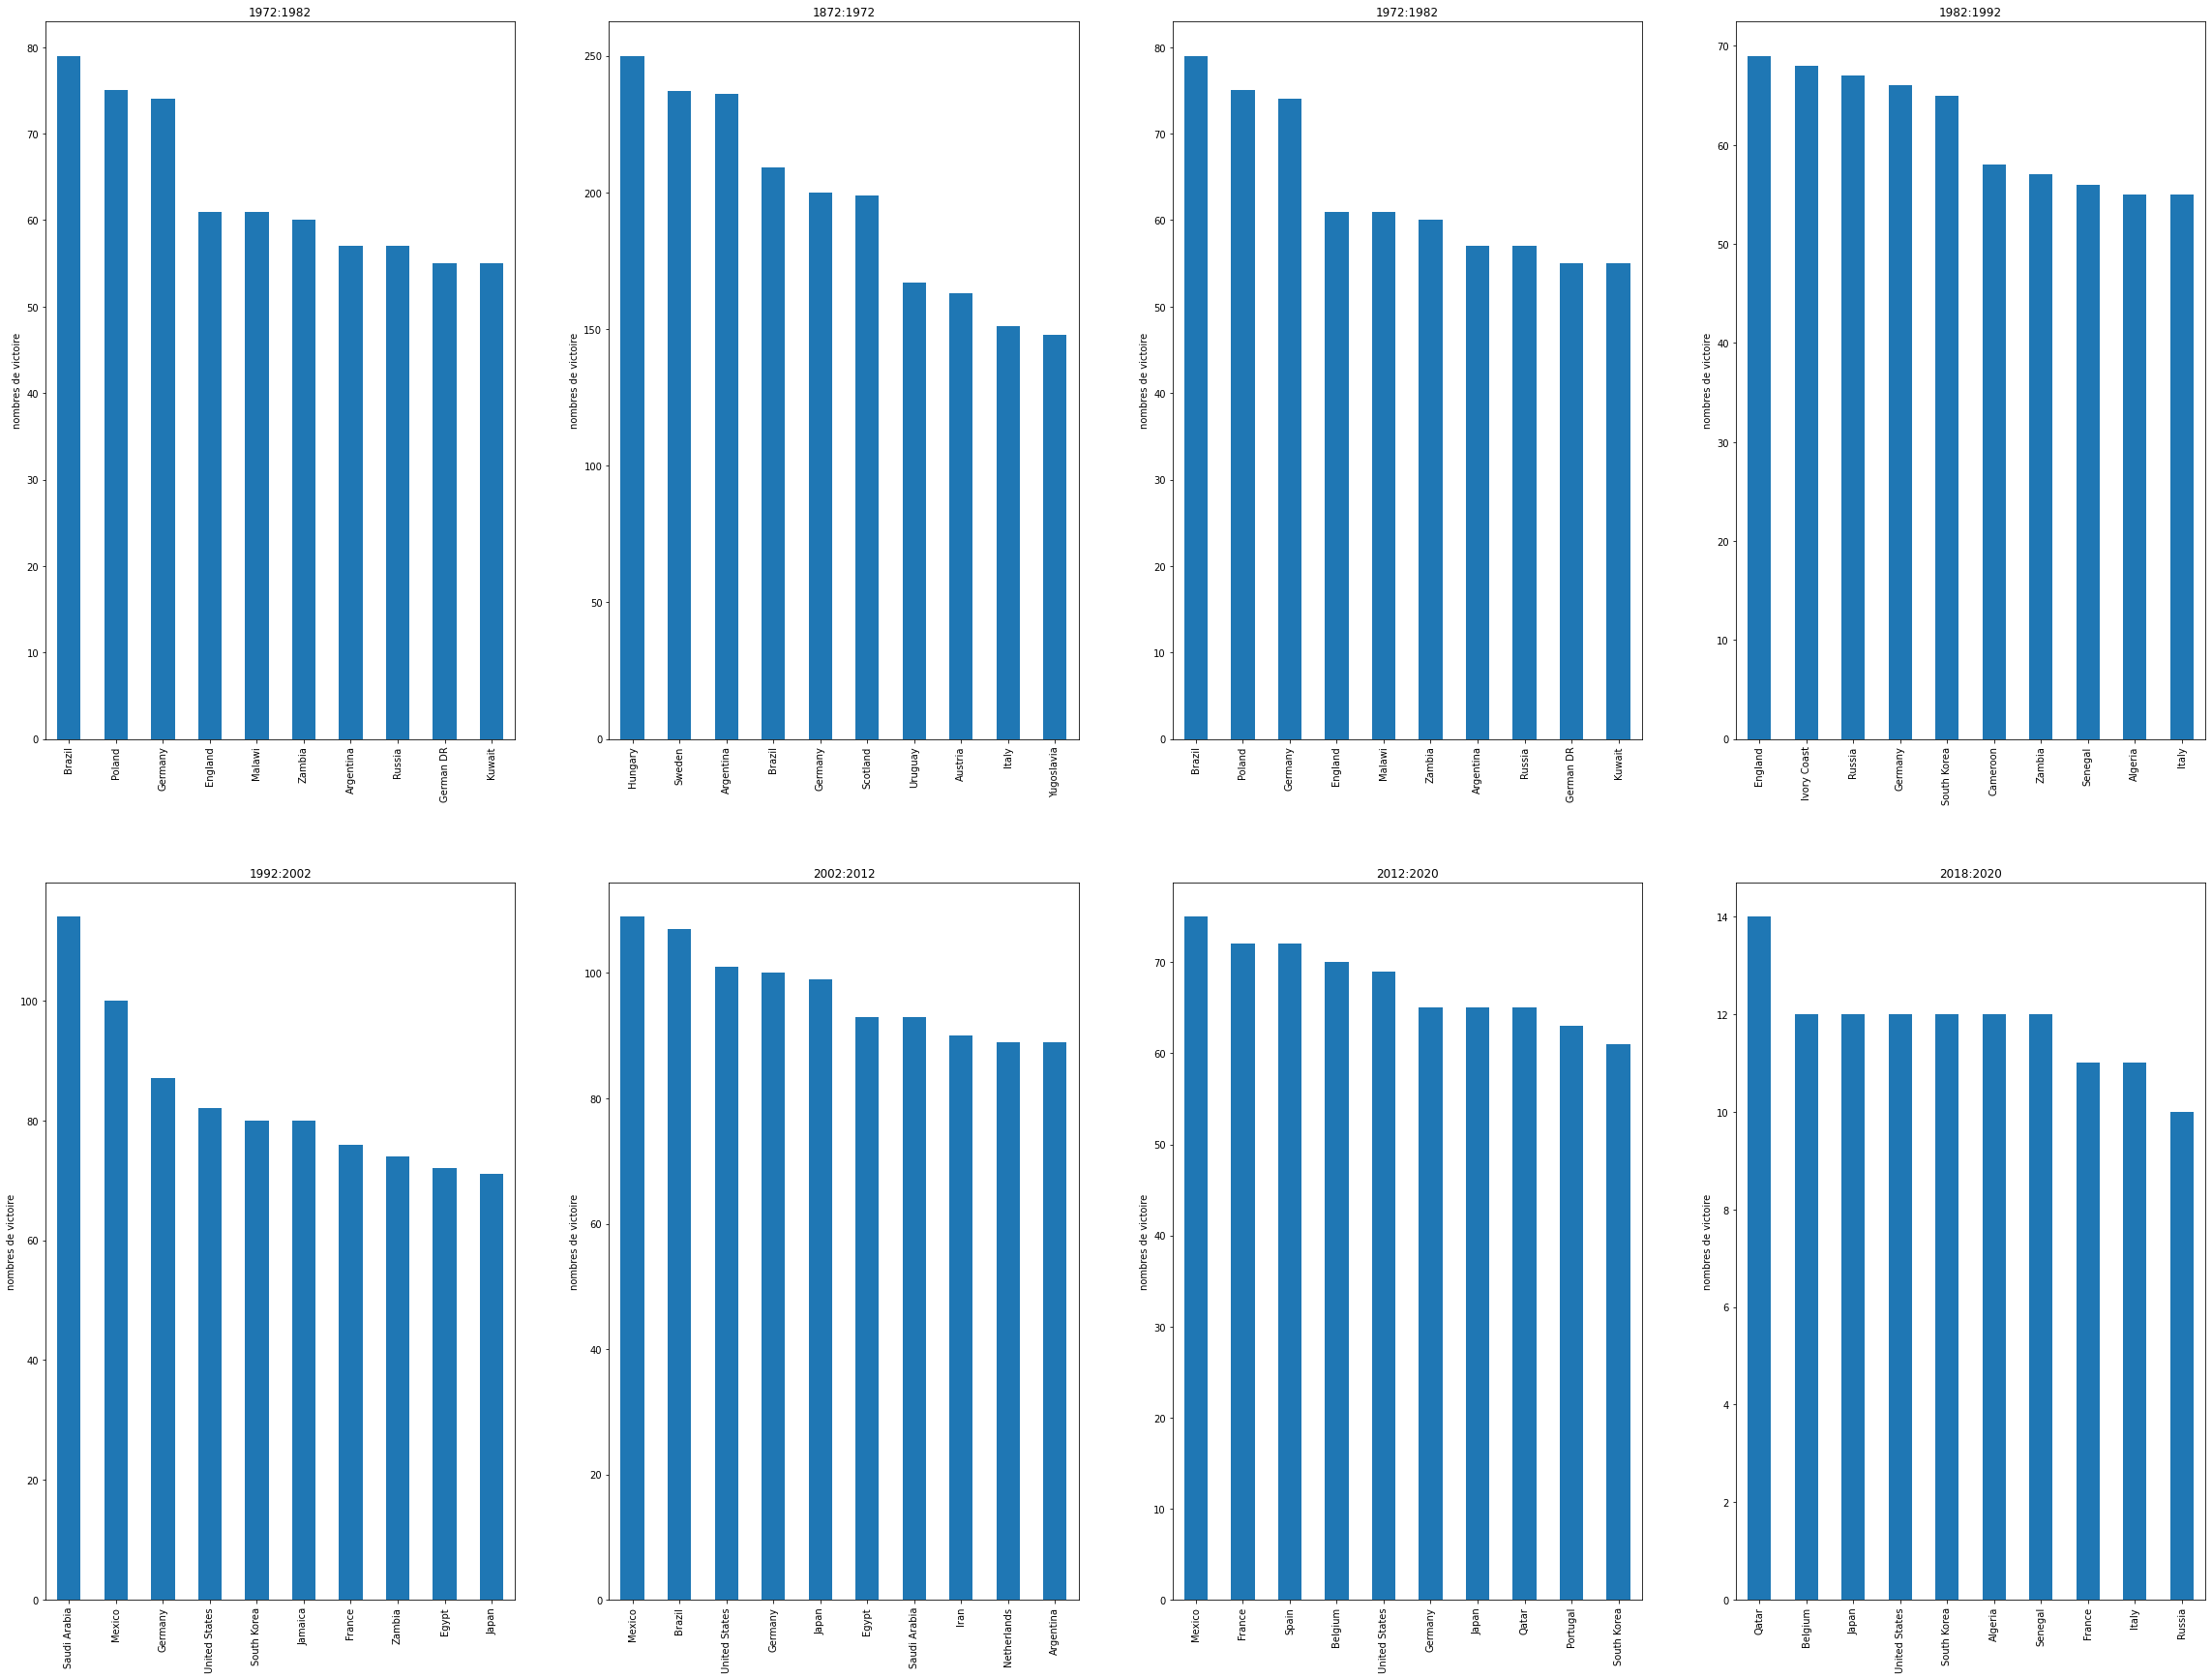

In [19]:
# Les statistiques des 10 équipes les plus victorieuses  durant différentes éres
plt.figure(figsize=(40,30))
plt.subplot(2,4, 1)
plt.title('1972:1982')
plt.ylabel("nombres de victoire")
data['1972':'1982']['winner'].value_counts().iloc[1:11].plot.bar()
plt.subplot(2,4, 2)
plt.title('1872:1972')
plt.ylabel("nombres de victoire")
data['1872':'1972']['winner'].value_counts().iloc[1:11].plot.bar()
plt.subplot(2,4, 3)
plt.title('1972:1982')
plt.ylabel("nombres de victoire")
data['1972':'1982']['winner'].value_counts().iloc[1:11].plot.bar()
plt.subplot(2,4, 4)
plt.title('1982:1992')
plt.ylabel("nombres de victoire")
data['1982':'1992']['winner'].value_counts().iloc[1:11].plot.bar()
plt.subplot(2,4, 5)
plt.title('1992:2002')
plt.ylabel("nombres de victoire")
data['1992':'2002']['winner'].value_counts().iloc[1:11].plot.bar()
plt.subplot(2,4, 6)
plt.title('2002:2012')
plt.ylabel("nombres de victoire")
data['2002':'2012']['winner'].value_counts().iloc[1:11].plot.bar()
plt.subplot(2,4, 7)
plt.title('2012:2020')
plt.ylabel("nombres de victoire")
data['2012':'2020']['winner'].value_counts().iloc[1:11].plot.bar()
plt.subplot(2,4, 8)
plt.title('2018:2020')
plt.ylabel("nombres de victoire")
data['2019':'2020']['winner'].value_counts().iloc[1:11].plot.bar()

# Moyenne de but à domicile et à l'éxterieur en 2019

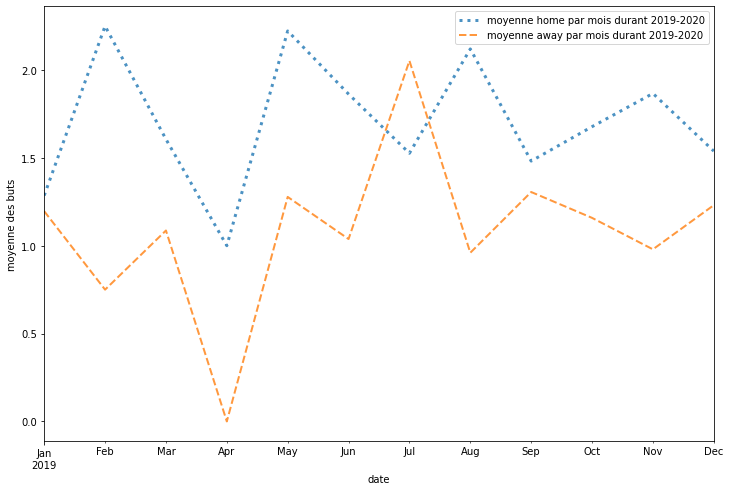

In [20]:
# Moyenne de but à domicile et à l'éxterieur en 2019
plt.figure(figsize=(12,8))
plt.ylabel("moyenne des buts")
data['2019']['home_score'].resample('M').mean().plot(label="moyenne home par mois durant 2019-2020", lw=3, ls=":", alpha=0.8)
data['2019']['away_score'].resample('M').mean().plot(label="moyenne away par mois durant 2019-2020", lw=2, ls="--", alpha=0.8)
plt.legend()
plt.show()

# Moy, Min, Max de but à domicile et à l'éxterieur en 2019

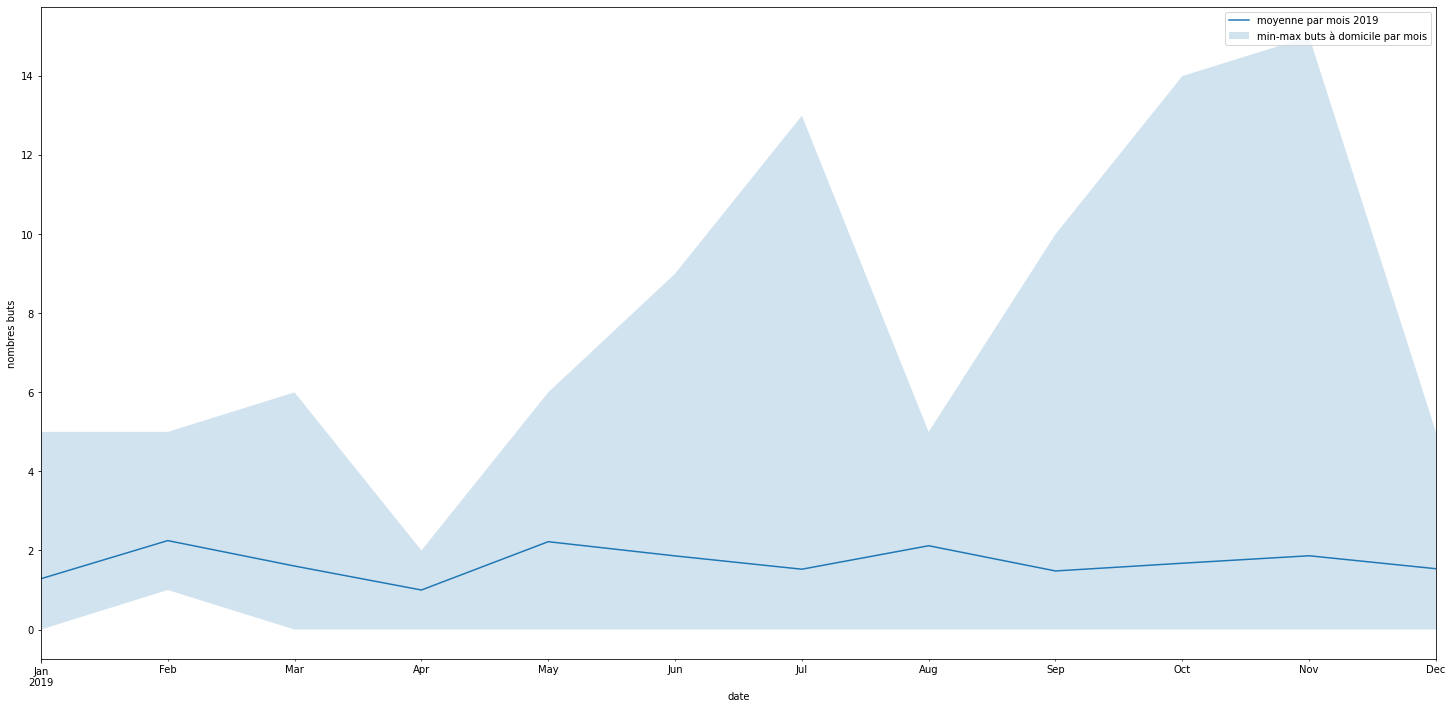

In [21]:
goals = data['2019']['home_score'].resample('M').agg(['mean','std','max','min'])

# Le graphe
plt.figure(figsize=(25,12))
plt.ylabel("nombres buts")
goals['mean'].plot(label="moyenne par mois 2019")
plt.fill_between(goals.index, goals['max'], goals['min'], alpha=0.2, label="min-max buts à domicile par mois")
plt.legend()
plt.show()